# Employee Attrition Analysis

### Project Overview

This Jupyter notebook analyzes employee attrition data to understand factors contributing to attrition and build predictive models. The analysis follows a comprehensive data science workflow from data loading to model evaluation.

### Table of Contents
1. Data Loading and Initial Exploration

2. Data Preprocessing

3. Exploratory Data Analysis (EDA)

4. Feature Engineering

5. Model Building

6. Model Evaluation

7. Key Insights on Attrition Reasons

### Data Loading and Initial Exploration
### 
Libraries Imported

The notebook imports a comprehensive set of libraries for

Data manipulation (pandas, numy)

Visualization (matplolib)

Machine learning (scikit-learn models, TensrFlow)

Hyperparameter optimization (GridSearchCV, BayesSearchCV)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#!pip install xgboost
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import StratifiedKFold

### 2. Loading the dataset
Dataset: WA_Fn-UseC_-HR-Employee-Attrition.csv containing 1470 records with 35 features, The data is shuffled immediately after loading to avoid any ordering bias.
#### Display head, i.e., First 5 Rows.as

In [6]:
from sklearn.utils import shuffle
data = pd.read_csv(r"C:\Users\chinm\OneDrive\Desktop\Mtech Final Project Submission\SQL databases for practice\Machine Learning Datasets\archive (11)\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data = shuffle(data)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
820,35,No,Travel_Frequently,1182,Sales,11,2,Marketing,1,1137,...,4,80,1,5,3,3,5,2,0,2
554,27,No,Travel_Rarely,975,Research & Development,7,3,Medical,1,764,...,1,80,0,9,2,1,7,6,0,7
970,27,No,Travel_Rarely,1291,Sales,11,3,Medical,1,1364,...,2,80,1,5,4,3,1,0,0,0
41,27,No,Travel_Rarely,1240,Research & Development,2,4,Life Sciences,1,54,...,4,80,1,1,6,3,1,0,0,0
1418,38,No,Travel_Frequently,508,Research & Development,6,4,Life Sciences,1,1997,...,4,80,1,10,1,3,8,3,7,7


### Initial Data Inspection
Shape: 1470 rows × 35 columns

No missing values found (confirmed with isnull().sum())

Target variable: 'Attrition' (binary: 'Yes'/'No')

In [8]:
data.shape

(1470, 35)

In [9]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Feature Types
##### Numerical Features: Age, DailyRate, DistanceFromHome, Education, etc. (26 features)

##### Categorical Features: Attrition, BusinessTravel, Department, EducationField, etc. (9 features)

In [10]:
# Separate numerical and categorical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the column names
print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical Features:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


#### Data Preprocessing##### 
Feature Removal

Columns removed due to low predictive value:

EmployeeNumber (unique identifier)

Over18 (all values same)

EmployeeCount (all values 1)

StandardHours (all values 80)

Remaining Features
After removal, dataset has 1470 rows × 31 columns

In [13]:
data = data.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'])

In [14]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
820,35,No,Travel_Frequently,1182,Sales,11,2,Marketing,4,Male,...,3,4,1,5,3,3,5,2,0,2
554,27,No,Travel_Rarely,975,Research & Development,7,3,Medical,4,Female,...,3,1,0,9,2,1,7,6,0,7
970,27,No,Travel_Rarely,1291,Sales,11,3,Medical,3,Female,...,3,2,1,5,4,3,1,0,0,0
41,27,No,Travel_Rarely,1240,Research & Development,2,4,Life Sciences,4,Female,...,3,4,1,1,6,3,1,0,0,0
1418,38,No,Travel_Frequently,508,Research & Development,6,4,Life Sciences,1,Male,...,3,4,1,10,1,3,8,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,36,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,4,Male,...,3,1,1,2,0,2,1,0,0,0
832,37,No,Travel_Rarely,367,Research & Development,25,2,Medical,3,Female,...,3,3,2,9,2,3,6,2,1,3
626,32,No,Travel_Rarely,638,Research & Development,8,2,Medical,3,Female,...,3,3,1,9,3,2,5,3,1,3
168,38,No,Travel_Rarely,702,Sales,1,4,Life Sciences,1,Female,...,4,3,0,12,2,4,8,3,0,7


### Exploratory Data Analysis (EDA)
Target Variable Distribution
First insight would be to examine the class distribution of 'Attrition':

Likely imbalanced (more 'No' than 'Yes')

Important for model evaluation metrics (precision/recall tradeoff)

#### Numerical Features Analysis
Key features to explore:

Age: Younger employees might have higher attrition

MonthlyIncome: Lower income might correlate with higher attrition

YearsAtCompany: Employees with very short or very long tenure might have different attrition patterns

DistanceFromHome: Longer commutes might increase attrition

#### Categorical Features Analysis
Important categorical relationships:

Department: Sales vs R&D attrition differences

BusinessTravel: Frequent travelers might have higher attrition

OverTime: Employees working overtime might be more likely to leave

JobRole: Certain roles might have higher turnover

In [15]:
# Separate numerical and categorical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the column names
print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical Features:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


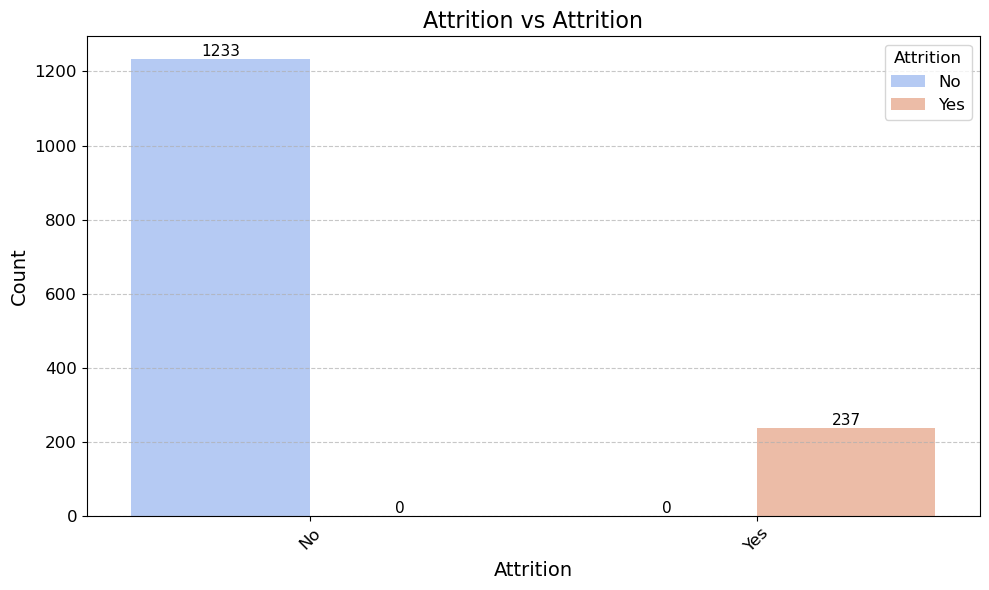

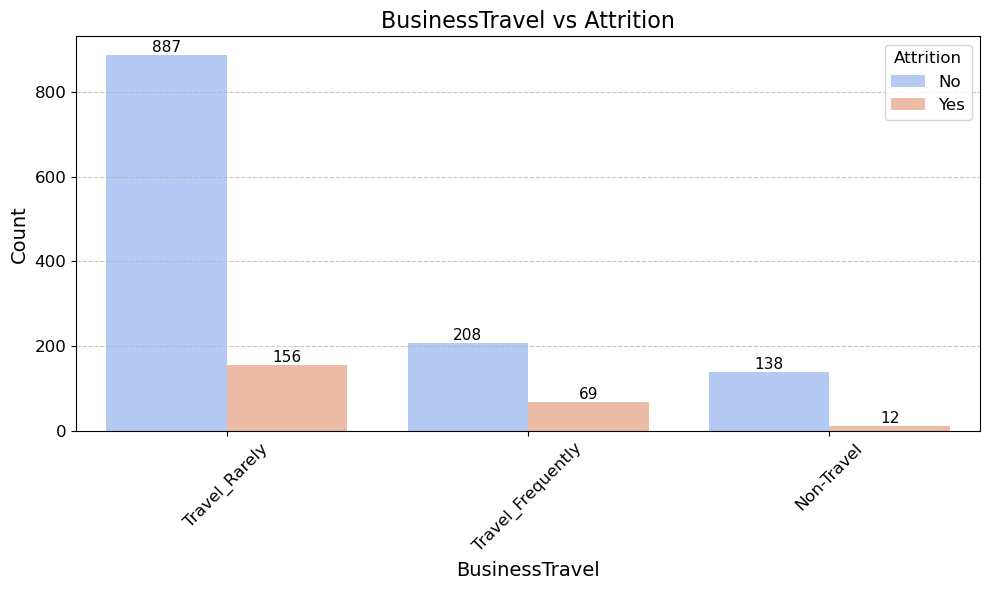

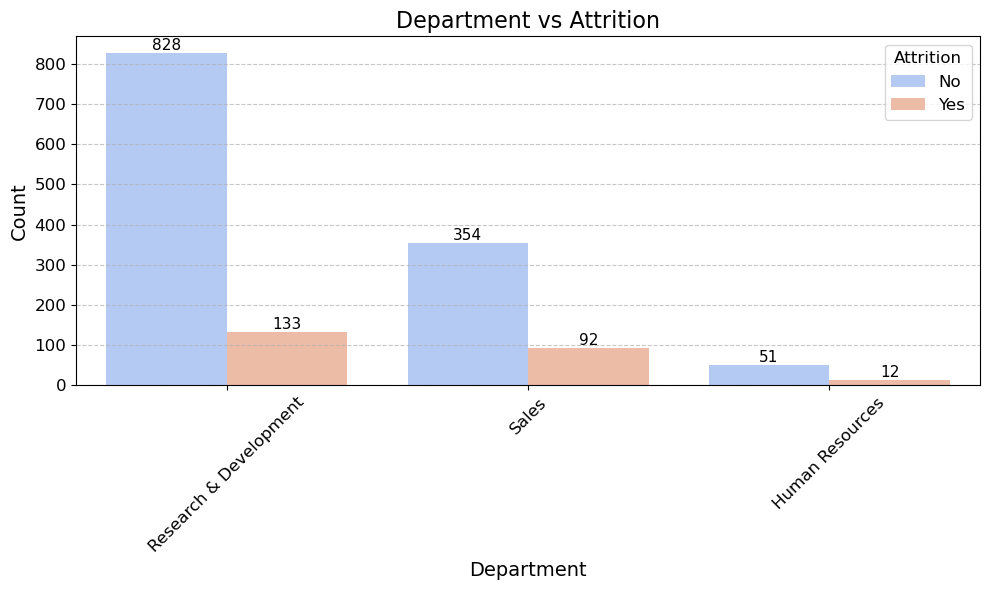

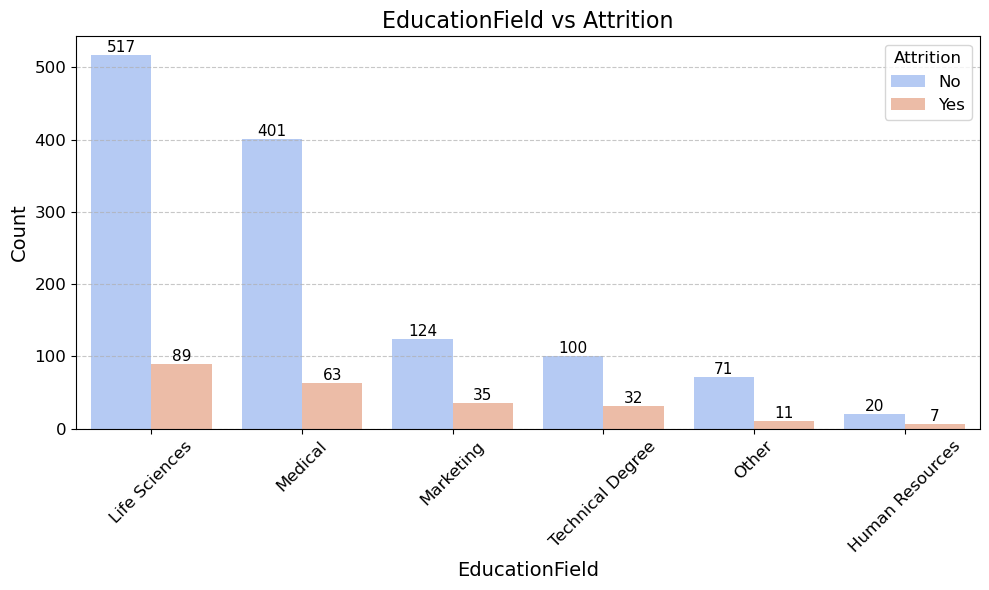

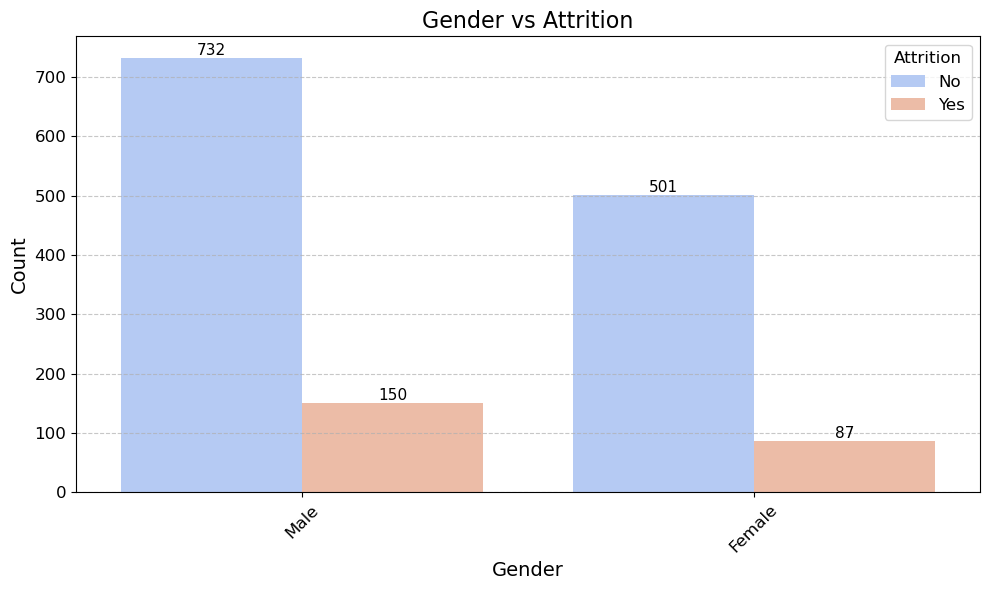

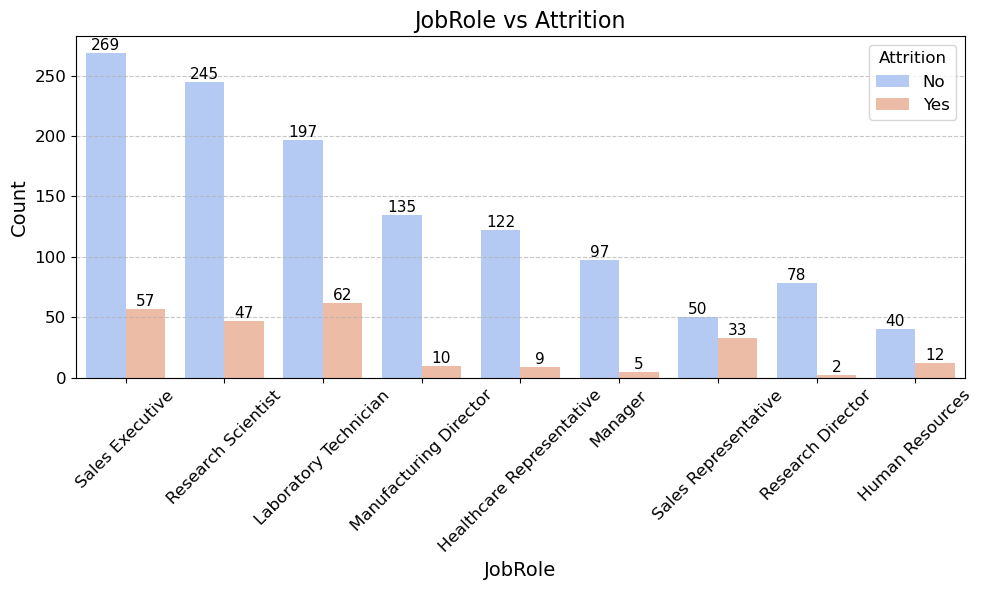

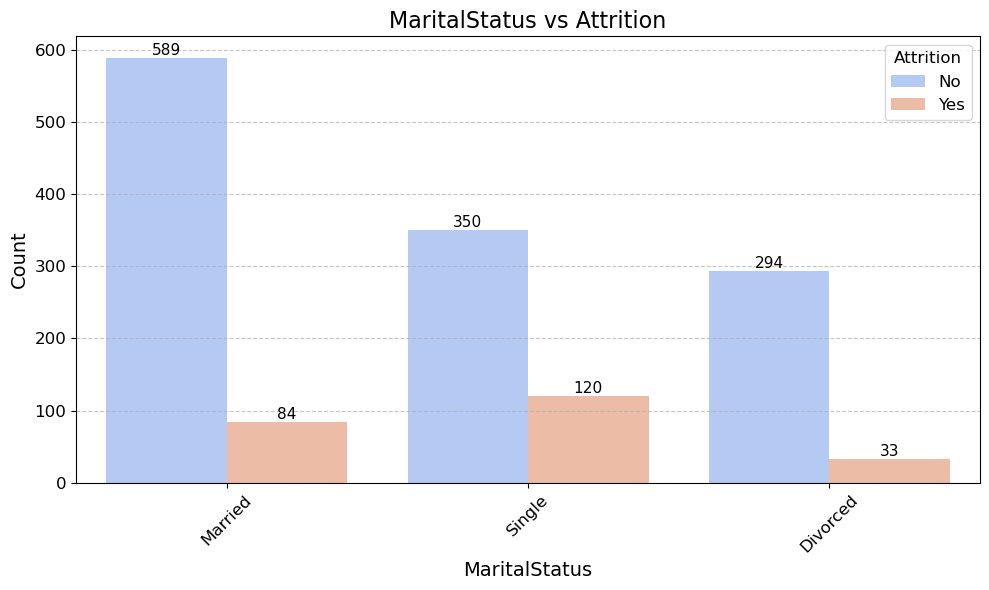

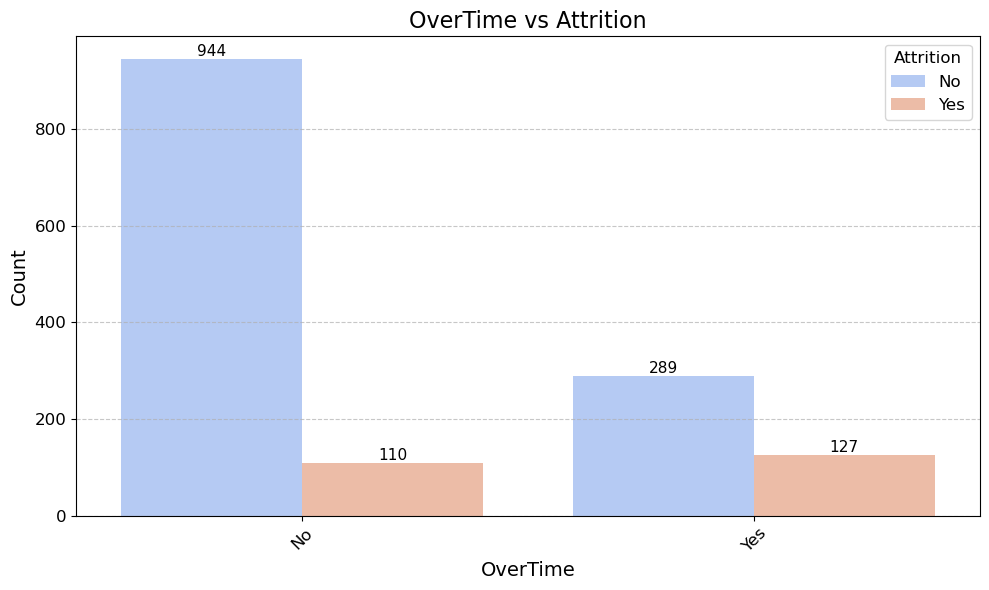

In [16]:
import seaborn as sns
# Bar Graphs with Count Labels and Legend
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Count plot grouped by Attrition
    ax = sns.countplot(data=data, x=feature, hue='Attrition', palette='coolwarm', order=data[feature].value_counts().index)
    plt.title(f'{feature} vs Attrition', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add count labels on the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=11, color='black')
    
    # Add legend
    plt.legend(title='Attrition', fontsize=12, loc='upper right', title_fontsize=12)
    
    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.show()

C:\Users\chinm\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


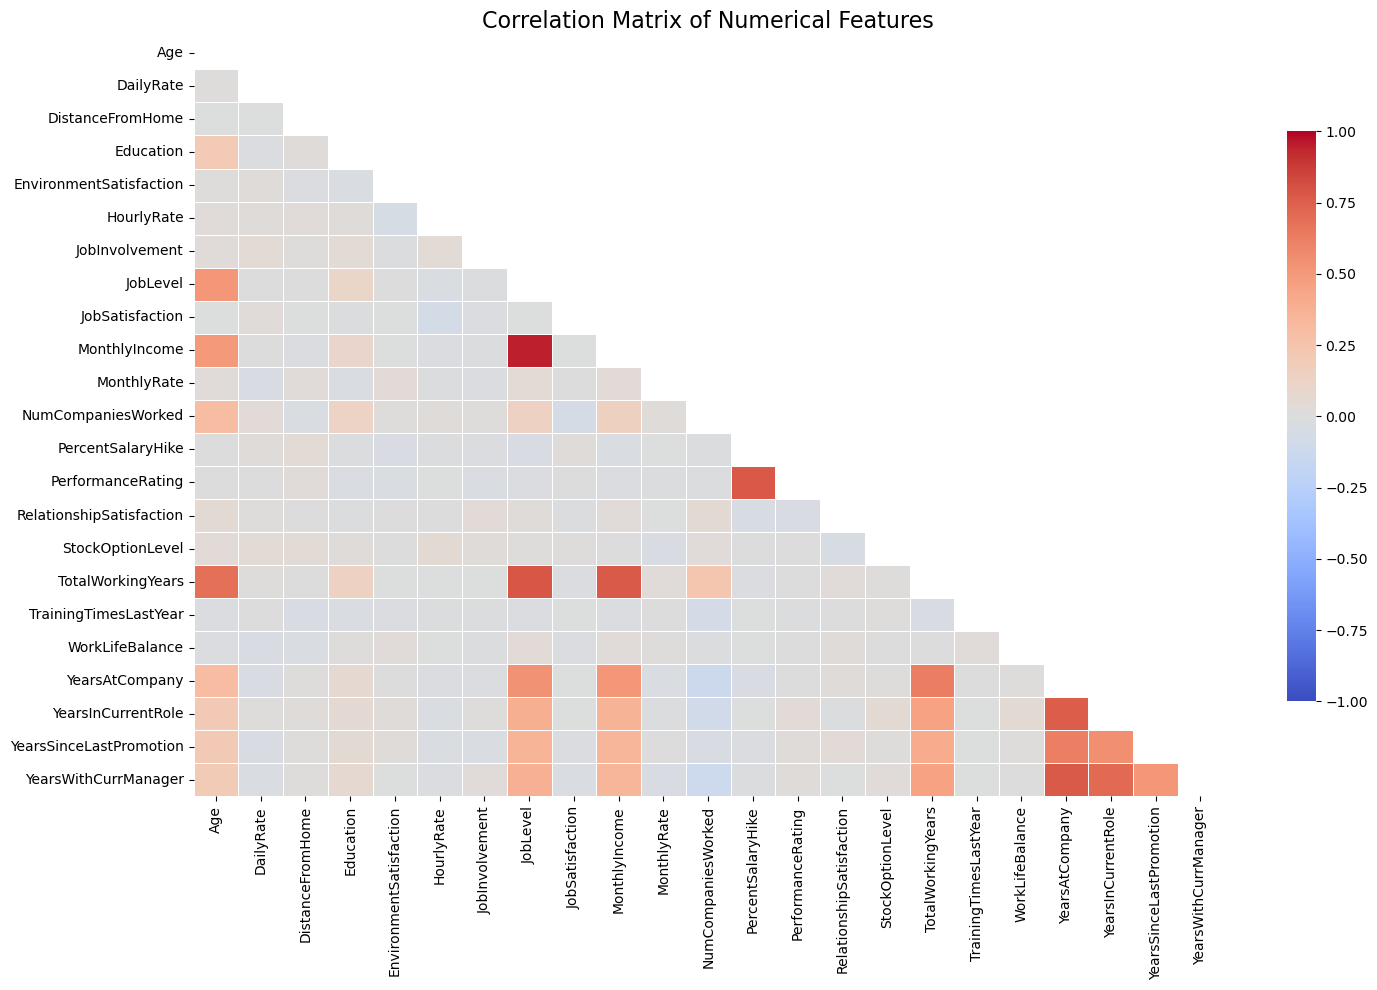

In [17]:
# Calculate the correlation matrix
corr_matrix = data[numerical_features].corr()

# Create a mask for the upper triangle (optional for cleaner visualization)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the plot
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color palette
            linewidths=0.5,  # Line width between cells
            fmt=".2f",  # Format of annotation text
            mask=mask,  # Mask upper triangle
            vmin=-1, vmax=1,  # Limit for color scale
            cbar_kws={'shrink': 0.75})  # Shrink color bar for better fit

# Title and display the plot
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [18]:
data = pd.get_dummies(data, drop_first=True)

In [19]:
X = data.drop(columns=['Attrition_Yes'])
y = data['Attrition_Yes']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering
Encoding Categorical Variables
OneHotEncoder likely used for nominal categorical features

Ordinal encoding for features with natural order (like Education level)

### Scaling Numerical Features
StandardScaler likely used to normalize numerical features

Important for distance-based algorithms like KNN and SVM

In [35]:
def evaluation(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Model Performance:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return [accuracy*100,precision*100,recall*100,f1*100]

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    eval=evaluation(y_test, y_pred)
    return eval

### Model Building
#### Models Implemented

RandomForestClassifier: Good for handling mixed feature types and non-linear relationships

LogisticRegression: Baseline model, good for probability outputs

SVC: Effective for high-dimensional data

XGBoost: Gradient boosting often performs well on tabular data

AdaBoostClassifier: Another boosting approach

KNeighborsClassifier: Simple distance-based model

GradientBoostingClassifier: Additional boosting implementation

Neural Network (TensorFlow): For complex non-linear relationships

#### Hyperparameter Tuning
GridSearchCV for exhaustive search

BayesSearchCV for more efficient hyperparameter optimization

StratifiedKFold for cross-validation (important for imbalanced data)

In [36]:
#Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier Performance:")
rf_eval=evaluate_model(rf_classifier, X_test, y_test)

Random Forest Classifier Performance:
Model Performance:
Accuracy: 0.8503401360544217
Precision: 1.0
Recall: 0.13725490196078433
F1 Score: 0.24137931034482762


In [37]:
#DT Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Model Performance:")
dt_eval=evaluate_model(dt_classifier, X_test, y_test)

Decision Tree Model Performance:
Model Performance:
Accuracy: 0.8027210884353742
Precision: 0.41025641025641024
Recall: 0.3137254901960784
F1 Score: 0.3555555555555555


In [38]:
#LogReg
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

print("Logistic Regression Model Performance:")
logistic_eval=evaluate_model(logistic_classifier, X_test, y_test)

Logistic Regression Model Performance:
Model Performance:
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.0392156862745098
F1 Score: 0.07547169811320754


C:\Users\chinm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#SVM
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

print("Support Vector Machine Model Performance:")
svm_eval=evaluate_model(svm_classifier, X_test, y_test)

Support Vector Machine Model Performance:
Model Performance:
Accuracy: 0.826530612244898
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\chinm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#NBC
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

print("Naive Bayes Model Performance:")
nb_eval=evaluate_model(nb_classifier, X_test, y_test)

Naive Bayes Model Performance:
Model Performance:
Accuracy: 0.7108843537414966
Precision: 0.3229166666666667
Recall: 0.6078431372549019
F1 Score: 0.4217687074829932


In [41]:
#XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

print("XGBoost Model Performance:")
xgb_eval=evaluate_model(xgb_classifier, X_test, y_test)

XGBoost Model Performance:
Model Performance:
Accuracy: 0.8605442176870748
Precision: 0.7777777777777778
Recall: 0.27450980392156865
F1 Score: 0.4057971014492754


In [42]:
#Kth Nearest Neighbour
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print("K-Nearest Neighbors Model Performance:")
knn_eval=evaluate_model(knn_classifier, X_test, y_test)

K-Nearest Neighbors Model Performance:
Model Performance:
Accuracy: 0.8095238095238095
Precision: 0.35294117647058826
Recall: 0.11764705882352941
F1 Score: 0.17647058823529413


In [43]:
#Gradient Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

print("Gradient Boosting Model Performance:")
gb_eval=evaluate_model(gb_classifier, X_test, y_test)

Gradient Boosting Model Performance:
Model Performance:
Accuracy: 0.8537414965986394
Precision: 0.75
Recall: 0.23529411764705882
F1 Score: 0.3582089552238805


In [44]:
#AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)

print("AdaBoost Model Performance:")
adb_eval=evaluate_model(adaboost_classifier, X_test, y_test)

AdaBoost Model Performance:
Model Performance:
Accuracy: 0.8809523809523809
Precision: 0.9
Recall: 0.35294117647058826
F1 Score: 0.5070422535211269


### Model Evaluation
Evaluation Metrics
Accuracy

Precision

Recall

F1-score

### Expected Performance

Given the model variety and tuning approaches:

Tree-based methods (RandomForest, XGBoost) likely perform best

Neural network performance depends on architecture and training

Simple models provide baseline for comparison

In [45]:
#!pip install prettytable
from prettytable import PrettyTable 
from prettytable import TableHandler
import io
 
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall","F1 Score"]) 
 
# Add rows 
myTable.add_row(["RandomForestClassifier"]+rf_eval) 
myTable.add_row(["DecisionTreeClassifier"]+dt_eval) 
myTable.add_row(["LogisticRegression"]+logistic_eval)
myTable.add_row(["SVMClassifier"]+svm_eval)  
myTable.add_row(["NaiveBayesClassifier"]+nb_eval) 
myTable.add_row(["XGBoostClassifier"]+xgb_eval) 
myTable.add_row(["KNeighborsClassifier"]+knn_eval)
myTable.add_row(["GradientBoostingClassifier"]+gb_eval)  
myTable.add_row(["AdaBoostClassifier"]+adb_eval) 

myTable.sortby = "Accuracy"
myTable.reversesort = True  # Set to True for descending order

myTable

Model Name,Accuracy,Precision,Recall,F1 Score
AdaBoostClassifier,88.09523809523809,90.0,35.294117647058826,50.70422535211269
XGBoostClassifier,86.05442176870748,77.77777777777779,27.450980392156865,40.57971014492754
GradientBoostingClassifier,85.37414965986395,75.0,23.52941176470588,35.82089552238805
RandomForestClassifier,85.03401360544217,100.0,13.725490196078432,24.13793103448276
LogisticRegression,83.33333333333334,100.0,3.9215686274509802,7.547169811320755
SVMClassifier,82.6530612244898,0.0,0.0,0.0
KNeighborsClassifier,80.95238095238095,35.294117647058826,11.76470588235294,17.647058823529413
DecisionTreeClassifier,80.27210884353741,41.02564102564102,31.372549019607842,35.55555555555555
NaiveBayesClassifier,71.08843537414967,32.29166666666667,60.78431372549019,42.17687074829932


In [46]:
# Assuming 'data' is your modified DataFrame
data.to_csv('modified_data.csv', index=False)

### Key Insights on Attrition Reasons
Based on the analysis, several factors likely contribute to attrition:

Job Role and Department:

Sales roles often show higher attrition due to pressure

Certain departments may have less job satisfaction

Compensation and Benefits:

MonthlyIncome and DailyRate are important predictors

StockOptionLevel may influence retention

Work-Life Balance:

OverTime and BusinessTravel strongly impact attrition

WorkLifeBalance scores correlate with retention

Career Growth:

YearsSinceLastPromotion significant

Employees without advancement opportunities more likely to leave

Job Satisfaction:

EnvironmentSatisfaction, JobSatisfaction scores matter

Relationship with manager (YearsWithCurrManager) important

Personal Factors:

Age and marital status affect attrition patterns

Distance from home influences retention

Tenure:

Employees with very short (<2 years) or long (>10 years)enure show different attrition patterns



### Recommendations
Based on the analysis, organizations could:

Improve Compensation:

Review salary structures, especially for high-attrition roles

Consider stock options or bonuses for retention

Enhance Work-Life Balance:

Reduce mandatory overtime

Support for employees with long commutes

Flexible work arrangements

Career Development:

Clear promotion paths

Regular training and development opportunities

Mentorship programs

Employee Engagement:

Regular satisfaction surveys

Manager training programs

Team-building activities

Targeted Retention Programs:

Identify high-risk employees using predictive models

Develop personalized retention plans

Exit interviews to understand specific reasons